# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [2]:
# Import your libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [167]:
# Your code here
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 5000000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))

tests

0     (0.0343222374821007, 0.9829852945223201)
1    (1.6226193671586082, 0.44427582427807066)
2     (0.21283841792491134, 0.899047680222069)
3      (0.6530512675639161, 0.721425881937833)
4     (0.8189791846919228, 0.6639890687640484)
dtype: object

#### Interpret the normaltest results and make your observations.

In [ ]:
# Explain the test results here
'''
Cuando el P-Value es menor a 0.05 se rechaza la hipótesis nula y se concluye que los datos no siguen una 
distribución normal.
'''

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

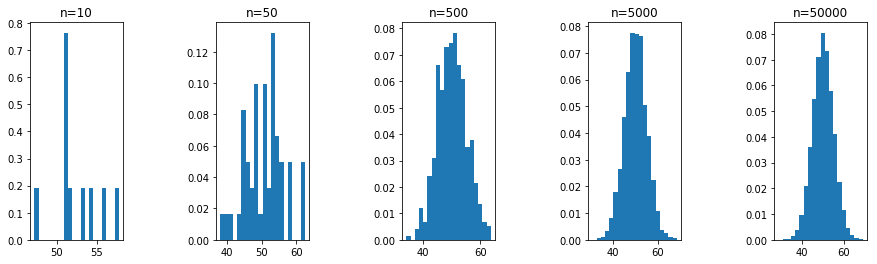

In [15]:
# Your code here
f, ax = plt.subplots(1, 5)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 5):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [ ]:
# Your comment and explanation here
'''
Cuanto mayor es el número de muestras, más se aproxima a la media de la población y por tanto más se acerca a una
distribución normal.
'''

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

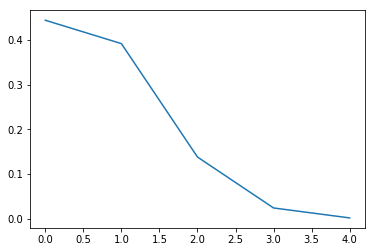

In [16]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

In [ ]:
# Your comment here
'''
A mayor numero de personas en la muestra, más nos acercamos a la probabilidad de que hacer click en el anuncio sea
0.15
'''

#### Now plot PMP with 50, 500, and 5000 visitors.

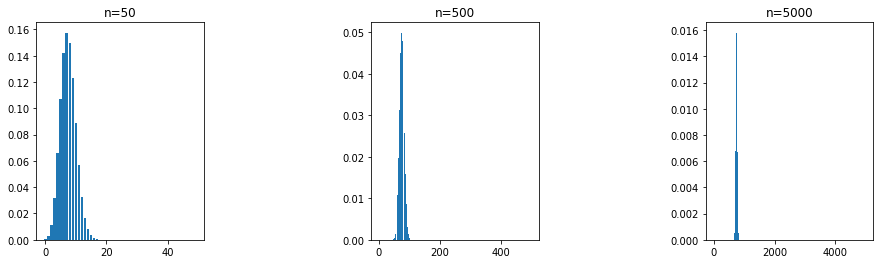

In [189]:
# Your code here
sample_size = pd.Series([50, 500, 5000])

f, ax = plt.subplots(1, 3)

p = 0.15

n = [50,500,5000]



f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 3):
    dist = binom(n[i], p)
    ax[i].set_title('n=%s' % (sample_size[i]))
    ax[i].bar(range(n[i]), dist.pmf(range(n[i])))

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Your comment here
'''
El eje central de la binomial siempre la da el tamaño de la muestra multiplicado por la probabilidad por lo que
este va a ser el punto donde se encuentre la mayor probabilidad.

En este caso particular, como la probabilidad es 0.15, en las gráficas se puede ver de que hay una mayor 
probabilidad de que el porcentaje de la muestra que haga click sea el 15% de la misma.
'''

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Your comment here
'''
Es una distribución de probabilidad discreta que expresa, a partir de una frecuencia de ocurrencia media, 
la probabilidad de que ocurra un determinado número de eventos durante cierto período de tiempo. 
Concretamente, se especializa en la probabilidad de ocurrencia de sucesos con probabilidades muy pequeñas, 
o sucesos "raros".
'''

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [218]:
# Your code here
from scipy.stats import poisson

prob=poisson.pmf(320,300)
prob

0.011612348610402475

#### What is the probability of getting 60 visits?

In [219]:
# Your code here
prob=poisson.pmf(60,300)
prob

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

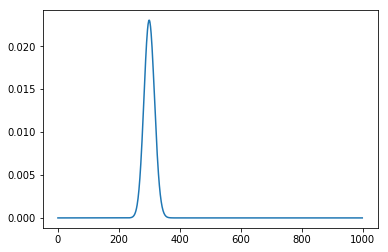

In [220]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)